In [1]:
#pip install torchsummary
#https://glassboxmedicine.com/2020/12/08/using-predefined-and-pretrained-cnns-in-pytorch-tutorial-with-code/

In [2]:
#step1
import os
import torch
import torchvision
from torch.utils.data import random_split
import torchvision.models as models
import torch.nn as nn
import torch.nn.functional as F

#import albumentations as A

print("hello world")



hello world


In [3]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import skimage.io as io
from skimage.transform import rotate, AffineTransform, warp
from skimage.util import random_noise
from skimage.filters import gaussian
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from torchsummary import summary
import pandas as pd
import numpy as np
from skimage.io import imread, imsave
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from skimage.transform import rotate
from skimage.util import random_noise
from skimage.filters import gaussian
from scipy import ndimage

In [5]:
#pip install torchdata
import torchdata as td

In [6]:

#step2
data_dir  = 'C:/Users/rajam/OneDrive/Desktop/imgdataset/Garbage classification/Garbage classification'

classes = os.listdir(data_dir)
print(classes)



['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']


In [7]:

#step 3
#Responsible for converting images (resizing and adding it to folder)
from torchvision.datasets import ImageFolder
import torchvision.transforms as transforms



#transformations = transforms.RandomChoice(transforms,p=None)
"""
transformations = transforms.Compose([transforms.Resize((256, 256)),
                                      transforms.RandomHorizontalFlip(), transforms.RandomCrop((224, 224)),transforms.RandomVerticalFlip(),transforms.RandomAdjustSharpness(0,p=0.5),
                                     transforms.RandomRotation(90),transforms.ToTensor(),transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) ])


"""
transformations = transforms.Compose([transforms.Resize((256, 256)),
                                      transforms.RandomHorizontalFlip(), transforms.RandomCrop((224, 224)),transforms.RandomVerticalFlip(),transforms.RandomAdjustSharpness(0,p=0.5),
                                   transforms.ToTensor(),transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) ])




dataset = ImageFolder(data_dir,transform = transformations)
print("completed step 3")
"""
RandomHorizontalFlip([p])
RandomRotation(degrees[, interpolation, …])
RandomVerticalFlip
GaussianBlur()
RandomAdjustSharpness()

"""


completed step 3


'\nRandomHorizontalFlip([p])\nRandomRotation(degrees[, interpolation, …])\nRandomVerticalFlip\nGaussianBlur()\nRandomAdjustSharpness()\n\n'

In [8]:
#https://stackoverflow.com/questions/51677788/data-augmentation-in-pytorch



In [9]:

#step 4
import matplotlib.pyplot as plt
%matplotlib inline

def show_sample(img, label):
    print("Label:", dataset.classes[label], "(Class No: "+ str(label) + ")")
    plt.imshow(img.permute(1, 2, 0))

print("completed step 4")


completed step 4


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label: cardboard (Class No: 0)
completed step 5


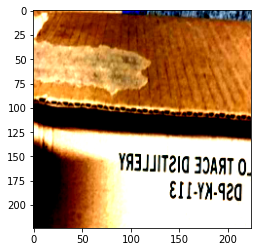

In [10]:

#step 5
img, label = dataset[12]
show_sample(img, label)
print("completed step 5")



In [11]:
#step 6
random_seed = 42
torch.manual_seed(random_seed)
print("completed step 6")


completed step 6


In [12]:

#step 7
train_ds, val_ds, test_ds = random_split(dataset, [2070, 257, 200])
#train_ds = train_ds.map(transformations)
#val_ds = val_ds.map(transformations)


trans_test = transforms.Compose([
     transforms.Resize((256, 256)),
     transforms.ToTensor(),
     transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
     ])


train_ds.transforms = transformations
val_ds.transforms = transformations
test_ds.transforms = trans_test
print('Training data : ',len(train_ds))
print('Validation data : ',len(val_ds))
print('Testing data : ',len(test_ds))
print("completed step 7")


Training data :  2070
Validation data :  257
Testing data :  200
completed step 7


In [13]:
#https://www.analyticsvidhya.com/blog/2019/12/image-augmentation-deep-learning-pytorch/

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label: paper (Class No: 3)


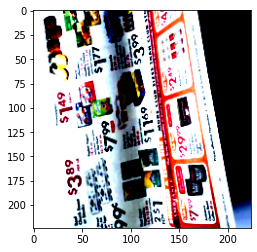

In [14]:
# just checking

img, label = test_ds[12]
show_sample(img, label)

In [15]:

#step 8
from torch.utils.data.dataloader import DataLoader
batch_size = 32
print("completed step 8")


completed step 8


In [16]:

def get_mean_std(loader):
    channels_sum, channels_squared_sum,num_batches = 0,0,0
    
    for data,_ in loader:
        channels_sum += torch.mean(data,dim=[0,2,3])
        channels_squared_sum += torch.mean(data**2,dim=[0,2,3])
        num_batches+=1
    
    mean = channels_sum/num_batches
    std = (channels_squared_sum/num_batches-mean**2)**0.5
    return mean,std
  

"""
normalization is applied to the test/validation-set 
if it has been applied to the training set. 
The important point is, 
that the parameters of this normalization 
have been calculated on the training data only 
and not on the whole set

"""

'\nnormalization is applied to the test/validation-set \nif it has been applied to the training set. \nThe important point is, \nthat the parameters of this normalization \nhave been calculated on the training data only \nand not on the whole set\n\n'

In [17]:


#step 9
#Training and Validation part

"""
transform = transforms.Compose([
              transforms.ToTensor()
          ])),
          
data_train = torch.utils.data.DataLoader(
    MNIST(
          '~/mnist_data', train=True, download=True, 
          transform = transforms.Compose([
              transforms.ToTensor()
          ])),
          batch_size=64,
          shuffle=True
          )
"""
train_dl = DataLoader(train_ds, batch_size, shuffle = True, num_workers = 4, pin_memory = True)
val_dl = DataLoader(val_ds, batch_size*2, num_workers = 4, pin_memory = True)
print("completed step 9")


completed step 9


In [18]:
#data = next(iter(train_dl))
#mean_dl = data[0].mean()
#std_dl = data[0].std()

#print("Mean : ",mean_dl)
#print("Standard Deviation : ",std_dl)


#mean,std = get_mean_std(train_dl)
#print("Mean : ",mean)
#print("Standard Deviation : ",std)

########## REFERENCE  ################
"""
Mean :  tensor([0.6752, 0.6417, 0.6062])
Standard Deviation :  tensor([0.2042, 0.2051, 0.2276])
"""

'\nMean :  tensor([0.6752, 0.6417, 0.6062])\nStandard Deviation :  tensor([0.2042, 0.2051, 0.2276])\n'

In [19]:
#after running the above cell start again from beginning

In [20]:

#step 10
from torchvision.utils import make_grid

def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 6))
        ax.set_xticks([])
        ax.set_yticks([])
        ax.imshow(make_grid(images, nrow = 16).permute(1, 2, 0))
        break

print("completed step 10")


completed step 10


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


completed step 11


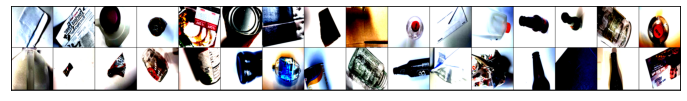

In [21]:

#step 11
show_batch(train_dl)
print("completed step 11")

In [22]:
#step 12
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        """
        F.poisson_nll_loss
        F.cross_entropy
        F.gaussian_nll_loss
        F.kl_div
        F.nll_loss
        """
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}

    
    def epoch_end(self, epoch, result):
        print("Epoch {}: train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch+1, result['train_loss'], result['val_loss'], result['val_acc']))
        
print("step 12 completed")

step 12 completed


In [23]:
#step 13

class ResNet(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        # Use a pretrained model
        self.network = models.resnet50(pretrained=True)
        # Replace last layer
        num_ftrs = self.network.fc.in_features
        self.network.fc = nn.Linear(num_ftrs, len(dataset.classes))
    
    def forward(self, xb):
        return torch.sigmoid(self.network(xb))

model = ResNet()

#softmax()
print("step 13 completed")

step 13 completed


In [24]:
#step 14
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

    
    
print("step 14 completed")

step 14 completed


In [25]:
#step 15

device = get_default_device()
print(device)
print("step 15 completed")

cpu
step 15 completed


In [26]:
#step 16
train_dl = DeviceDataLoader(train_dl, device)
val_dl = DeviceDataLoader(val_dl, device)
to_device(model, device)
print(to_device(model, device))
print("step 16 completed")

ResNet(
  (network): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (

In [27]:
#step 17
#training the model

@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    return history

print("step 17 completed")

step 17 completed


In [28]:
model = to_device(ResNet(), device)

print("step 18 completed")

step 18 completed


In [29]:
evaluate(model, val_dl)

print("step 19 completed")

step 19 completed


In [30]:
%%time
num_epochs = 10
opt_func = torch.optim.NAdam
lr = 5.5e-5
#lr = 5.13e-03
history = fit(num_epochs, lr, model, train_dl, val_dl, opt_func)

print("step 20 completed")

#2 hrs 
#5.13e-03

Epoch 1: train_loss: 1.4423, val_loss: 1.2295, val_acc: 0.8813
Epoch 2: train_loss: 1.1885, val_loss: 1.1408, val_acc: 0.9219
Epoch 3: train_loss: 1.1339, val_loss: 1.1063, val_acc: 0.9594
Epoch 4: train_loss: 1.1024, val_loss: 1.1017, val_acc: 0.9438
Epoch 5: train_loss: 1.0919, val_loss: 1.0953, val_acc: 0.9563
Epoch 6: train_loss: 1.0790, val_loss: 1.0903, val_acc: 0.9563
Epoch 7: train_loss: 1.0717, val_loss: 1.0917, val_acc: 0.9656
Epoch 8: train_loss: 1.0713, val_loss: 1.0965, val_acc: 0.9438
Epoch 9: train_loss: 1.0692, val_loss: 1.0899, val_acc: 0.9594
Epoch 10: train_loss: 1.0669, val_loss: 1.0890, val_acc: 0.9594
step 20 completed
CPU times: total: 9h 56min 42s
Wall time: 3h 21min 51s


In [31]:

%%time

num_epochs = 1
opt_func = torch.optim.NAdam
lr = 5.5e-5

#5.13e-03

history = fit(num_epochs, lr, model, train_dl, val_dl, opt_func)

print("step 20 completed")




#        acc = accuracy(out, labels)           # Calculate accuracy

## out--> predicted     labels --> labels


Epoch 1: train_loss: 1.0651, val_loss: 1.0763, val_acc: 0.9781
step 20 completed
CPU times: total: 1h 23min 25s
Wall time: 21min 39s


In [46]:

%%time
num_epochs = 1
opt_func = torch.optim.NAdam
lr = 5.5e-5

#5.13e-03

history = fit(num_epochs, lr, model, train_dl, val_dl, opt_func)

print("step 20 completed")



Epoch 1: train_loss: 1.0617, val_loss: 1.1054, val_acc: 0.9406
step 20 completed
CPU times: total: 1h 23min 20s
Wall time: 21min 34s


In [47]:
%%time
num_epochs = 1
opt_func = torch.optim.NAdam
lr = 5.5e-5

#5.13e-03

history = fit(num_epochs, lr, model, train_dl, val_dl, opt_func)

print("step 20 completed")


Epoch 1: train_loss: 1.0600, val_loss: 1.0902, val_acc: 0.9531
step 20 completed
CPU times: total: 1h 22min 30s
Wall time: 34min 32s


In [ ]:
%%time
num_epochs = 1
opt_func = torch.optim.NAdam
lr = 5.5e-5

#5.13e-03

history = fit(num_epochs, lr, model, train_dl, val_dl, opt_func)

print("step 20 completed")


In [ ]:
%%time
num_epochs = 5
opt_func = torch.optim.NAdam
lr = 5.5e-5

#5.13e-03

history = fit(num_epochs, lr, model, train_dl, val_dl, opt_func)

print("step 20 completed")


step 21 completed


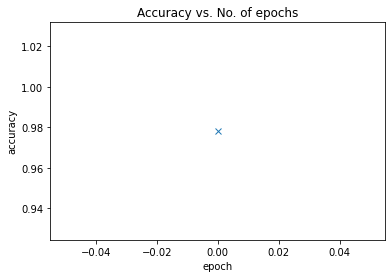

In [32]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

plot_accuracies(history)

print("step 21 completed")

None
step 22 completed


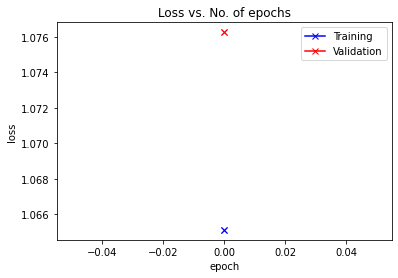

In [33]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

plot_losses(history)
print(plot_losses(history))

print("step 22 completed")

In [34]:
def predict_image(img, model):
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    prob, preds  = torch.max(yb, dim=1)
    # Retrieve the class label
    return dataset.classes[preds[0].item()]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label: metal , Predicted: metal


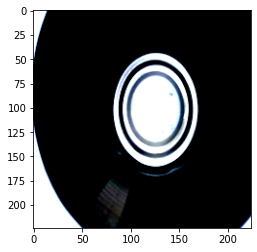

In [35]:
img, label = test_ds[17]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label: glass , Predicted: glass


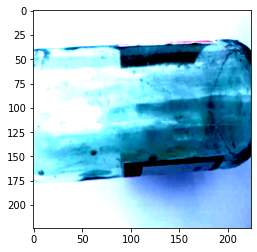

In [36]:
img, label = test_ds[23]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label: glass , Predicted: glass


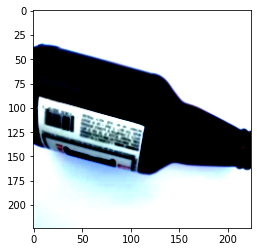

In [37]:
img, label = test_ds[51]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

In [38]:
#Predicting External Images
#refer https://www.kaggle.com/sudarshansrinivasan/garbage-classify-95-accuracy-scr-p-2
#model accuracy calculation  

print(len(train_ds))
print(len(val_ds)) 
print(len(test_ds))

2070
257
200


In [39]:
loaded_model = model


In [40]:
from PIL import Image
from pathlib import Path

def predict_external_image(image_name):
    image = Image.open(Path('C:/Users/rajam/OneDrive/Desktop/college project/Code/projectreview1/images/' + image_name))
    #C:\Users\rajam\OneDrive\Desktop\college project\Code\projectreview1\images
    example_image = transformations(image)
    plt.imshow(example_image.permute(1, 2, 0))
    print("The image resembles", predict_image(example_image, loaded_model) + ".")
"""
def predict():
    
    #predictions = [predict_image(x,loaded_model) for x in test_ds]
    for y in range(0,len(test_ds)):
        img, label = test_ds[y]
        show_sample(img, label)
        
        #predictions[y] = predict_image(img, loaded_model)
        print("The image resembles", predict_image(img, loaded_model) + ".")
        #print(predictions[y])
        
    #return predictions

"""  

'\ndef predict():\n    \n    #predictions = [predict_image(x,loaded_model) for x in test_ds]\n    for y in range(0,len(test_ds)):\n        img, label = test_ds[y]\n        show_sample(img, label)\n        \n        #predictions[y] = predict_image(img, loaded_model)\n        print("The image resembles", predict_image(img, loaded_model) + ".")\n        #print(predictions[y])\n        \n    #return predictions\n\n'

In [ ]:
#predict()
#error

In [41]:
#predict_image(test_ds[12], loaded_model)
#error
img, label = test_ds[12]
print(label)
print(dataset.classes[label])

3
paper


In [42]:
#predict()

from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

import seaborn as sns

import pandas as pd

In [43]:
def accuracy_calculation():
    #x = ['']*len(test_ds)
    #xp = ['']*len(test_ds)
    x=[]
    xp=[]
    correct_prediction_count = 0
    incorrect_prediction_count = 0
    waste_types = ['cardboard','glass','metal','paper','plastic','trash']
    #predictions = [predict_image(x,loaded_model) for x in test_ds]
    for y in range(0,len(test_ds)):
        img, label = test_ds[y]
        #show_sample(img, label)
        actual = dataset.classes[label]
        prediction = predict_image(img, model)
        #print("The image resembles", predict_image(img, loaded_model) + ".")
        #print(predictions[y])
        x.append(actual)
        xp.append(prediction)
        if(actual == prediction):
            correct_prediction_count = correct_prediction_count+1
        else:
            incorrect_prediction_count = incorrect_prediction_count+1
        
    accuracy = (correct_prediction_count/len(test_ds))*100
    print("correct_prediction_count : ",correct_prediction_count)
    print("incorrect_prediction_count : ",incorrect_prediction_count)
    print("total test data : ",len(test_ds))
    print("Accuracy : ",accuracy)
    
    
    
    cm = confusion_matrix(x,xp)
    print("Confusion matrix : ")
    print(cm)
    
    df_cm = pd.DataFrame(cm,waste_types,waste_types)

    plt.figure(figsize=(10,8))
    sns.heatmap(df_cm,annot=True,fmt="d",cmap="YlGnBu")
    

correct_prediction_count :  190
incorrect_prediction_count :  10
total test data :  200
Accuracy :  95.0
Confusion matrix : 
[[34  0  0  0  0  0]
 [ 0 38  0  0  2  0]
 [ 0  0 31  0  0  0]
 [ 0  0  0 44  0  2]
 [ 0  1  2  0 32  0]
 [ 1  0  0  2  0 11]]


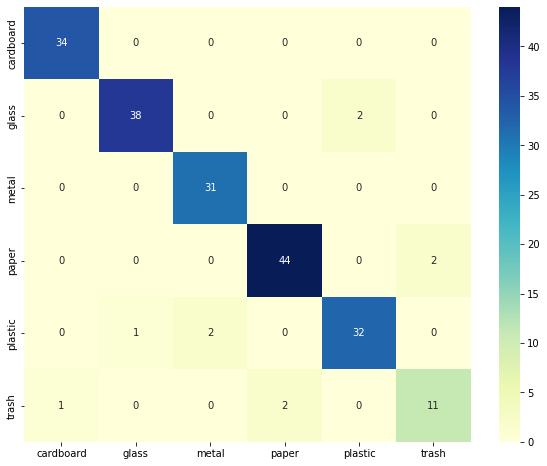

In [44]:
"""
Resnet50
Cross entropy
augmentation: YES
Batch size 32
NAdam opt
train - val - test -- 2070-257-200 epoch23
"""

accuracy_calculation()

## x axis predicted
## y axis actual

In [ ]:
data_dir  = 'C:/Users/rajam/OneDrive/Desktop/imgdataset/Garbage classification/Garbage classification'

categories = os.listdir(data_dir)
print(categories)



for i in categories:
    list = os.listdir(data_dir+"/"+i) 
    number_files = len(list)
    print(" ",i," : ",number_files)

In [ ]:
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (type(list),type(tuple))):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

In [ ]:
trans_test = transforms.Compose([
     transforms.Resize((256, 256)),
     transforms.ToTensor(),
     transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
     ])

In [ ]:
#1
predict_external_image('tincan.jpg')

In [ ]:
#2
predict_external_image('cardboard.jpg')

In [ ]:
#3
predict_external_image('cardboard3.jpg')

In [ ]:
#4
predict_external_image('cb1.jpg')

In [ ]:
#5
predict_external_image('glass.jpg')

In [ ]:
#6
predict_external_image('plastic1.jpg')

In [ ]:
#7
predict_external_image('tin1.jpg')

In [ ]:
#8
predict_external_image('tin2.jpg')

In [ ]:
#9
predict_external_image('wine_bottle.jpg')

In [ ]:
"""
Out of 9 inputs
Cardboard 3 ALL CORRECT
Glass 2 --> 1 CORRECT
Metal 3 ALL CORRECT
Plastic 1 ALL CORRECT
"""

In [45]:
torch.save(loaded_model.state_dict(),'C:/Users/rajam/OneDrive/Desktop/college project/Code/projectreview1/resnet50_b32_aug_nadam23.pth')

## resnet18try.pth - batch 16
## resnet18batch32.pth

In [ ]:
trans_test = transforms.Compose([
     transforms.Resize((256, 256)),
     transforms.ToTensor(),
     transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
     ])


In [ ]:


def predict_external_image1(image_name):
    image = Image.open(Path('C:/Users/rajam/OneDrive/Desktop/college project/Code/projectreview1/images/' + image_name))

    example_image = trans_test(image)
    plt.imshow(example_image.permute(1, 2, 0))
    print("The image resembles", predict_image(example_image, loaded_model) + ".")


In [ ]:
predict_external_image1('plastic1.jpg')

In [ ]:
predict_external_image1('wine_bottle1.jpg')

In [ ]:
predict_external_image1('tincan.jpg')

In [ ]:
predict_external_image1('glass.jpg')

In [ ]:
predict_external_image('cb1.jpg')

In [ ]:
PATH = 'C:/Users/rajam/OneDrive/Desktop/college project/Code/projectreview1/resnet18batch32.pth'

torch.save(loaded_model.state_dict(), PATH)

In [ ]:

#the_model = TheModelClass(*args, **kwargs)
the_model = ResNet()

the_model.load_state_dict(torch.load(PATH))

In [ ]:
the_model.eval()
#must r

In [ ]:


#def predict_external_image1(image_name):
image = Image.open(Path('C:/Users/rajam/OneDrive/Desktop/college project/Code/projectreview1/images/glass.jpg'))

example_image = trans_test(image)
plt.imshow(example_image.permute(1, 2, 0))
print("The image resembles", predict_image(example_image, the_model) + ".")


In [ ]:


#def predict_external_image1(image_name):
image = Image.open(Path('C:/Users/rajam/OneDrive/Desktop/college project/Code/projectreview1/images/cb1.jpg'))

example_image = trans_test(image)
plt.imshow(example_image.permute(1, 2, 0))
print("The image resembles", predict_image(example_image, the_model) + ".")


In [ ]:
#def predict_external_image1(image_name):
image = Image.open(Path('C:/Users/rajam/OneDrive/Desktop/college project/Code/projectreview1/images/cardboard3.jpg'))

example_image = trans_test(image)
plt.imshow(example_image.permute(1, 2, 0))
print("The image resembles", predict_image(example_image, the_model) + ".")


In [ ]:


#def predict_external_image1(image_name):
image = Image.open(Path('C:/Users/rajam/OneDrive/Desktop/college project/Code/projectreview1/images/glass.jpg'))

example_image = trans_test(image)
plt.imshow(example_image.permute(1, 2, 0))
print("The image resembles", predict_image(example_image, the_model) + ".")
